In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
# 데이터 로드 및 전처리
# 예시 데이터, 실제 데이터에 맞게 수정이 필요합니다.

data = pd.read_csv('/content/7km외오피스텔정보_훈련세트.csv', encoding='cp949')
test_data = pd.read_csv('/content/경희대학교반경7km오피스텔.csv',  encoding='cp949')
Yeah = pd.read_csv('/content/new_data4.csv', encoding='cp949')



#####################################################################
def min_max_scaling(value, min_val, max_val):
    return (value - min_val) / (max_val - min_val)

# 위도와 경도의 최소값 및 최대값
min_latitude, max_latitude = -90, 90
min_longitude, max_longitude = -180, 180

# CSV 파일 읽어오기
place_data = pd.read_csv("/content/7km외오피스텔정보_훈련세트.csv", encoding='cp949')
place_test_data = pd.read_csv('/content/경희대학교반경7km오피스텔.csv',  encoding='cp949')
place_Yeah = pd.read_csv('/content/new_data4.csv', encoding='cp949')

# 위도와 경도 스케일링

place_data_scaled_latitude = min_max_scaling(place_data['X'], min_latitude, max_latitude)
place_data_scaled_longitude = min_max_scaling(place_data['Y'], min_longitude, max_longitude)

place_test_data_scaled_latitude = min_max_scaling(place_test_data['X'], min_latitude, max_latitude)
place_test_data_scaled_longitude = min_max_scaling(place_test_data['Y'], min_longitude, max_longitude)

place_Yeah_scaled_latitude = min_max_scaling(place_Yeah['X'], min_latitude, max_latitude)
place_Yeah_scaled_longitude = min_max_scaling(place_Yeah['Y'], min_longitude, max_longitude)



data['scaled_latitude'] = place_data_scaled_latitude
data['scaled_longitude'] = place_data_scaled_longitude


test_data['scaled_latitude'] = place_test_data_scaled_latitude
test_data['scaled_longitude'] = place_test_data_scaled_longitude


Yeah['scaled_latitude'] = place_Yeah_scaled_latitude
Yeah['scaled_longitude'] = place_Yeah_scaled_longitude





########################################################################

# 독립변수와 종속변수 분리  X=input, y=target

#훈련데이터
X_19 = data[['전용면적(㎡)', '층_2019', '건축년도', 'scaled_latitude', 'scaled_longitude']]
X_20 = data[['전용면적(㎡)', '층_2020', '건축년도', 'scaled_latitude', 'scaled_longitude']]
X_21 = data[['전용면적(㎡)', '층_2021', '건축년도', 'scaled_latitude', 'scaled_longitude']]
X_22 = data[['전용면적(㎡)', '층_2022', '건축년도', 'scaled_latitude', 'scaled_longitude']]
X_23 = data[['전용면적(㎡)', '층_2023', '건축년도', 'scaled_latitude', 'scaled_longitude']]

#테스트데이터
XX_19 = test_data[['전용면적(㎡)', '층_2019', '건축년도', 'scaled_latitude', 'scaled_longitude']]
XX_20 = test_data[['전용면적(㎡)', '층_2020', '건축년도', 'scaled_latitude', 'scaled_longitude']]
XX_21 = test_data[['전용면적(㎡)', '층_2021', '건축년도', 'scaled_latitude', 'scaled_longitude']]
XX_22 = test_data[['전용면적(㎡)', '층_2022', '건축년도', 'scaled_latitude', 'scaled_longitude']]
XX_23 = test_data[['전용면적(㎡)', '층_2023', '건축년도', 'scaled_latitude', 'scaled_longitude']]

#난주생성데이터
XXX_19 = Yeah[['전용면적(㎡)', '층_2019', '건축년도', 'scaled_latitude', 'scaled_longitude']]
XXX_20 = Yeah[['전용면적(㎡)', '층_2020', '건축년도', 'scaled_latitude', 'scaled_longitude']]
XXX_21 = Yeah[['전용면적(㎡)', '층_2021', '건축년도', 'scaled_latitude', 'scaled_longitude']]
XXX_22 = Yeah[['전용면적(㎡)', '층_2022', '건축년도', 'scaled_latitude', 'scaled_longitude']]
XXX_23 = Yeah[['전용면적(㎡)', '층_2023', '건축년도', 'scaled_latitude', 'scaled_longitude']]



y_19 = data['최종 집값(만원)_2019']
y_20 = data['최종 집값(만원)_2020']
y_21 = data['최종 집값(만원)_2021']
y_22 = data['최종 집값(만원)_2022']
y_23 = data['최종 집값(만원)_2023']

yy_19 = test_data['최종 집값(만원)_2019']
yy_20 = test_data['최종 집값(만원)_2020']
yy_21 = test_data['최종 집값(만원)_2021']
yy_22 = test_data['최종 집값(만원)_2022']
yy_23 = test_data['최종 집값(만원)_2023']

yyy = Yeah['최종 집값(만원)']

# 학습 데이터와 테스트 데이터로 나누기  ---->>>>>> 안나눠도 되자나 #########################################
X_19_train, X_19_test, y_19_train, y_19_test = train_test_split(X_19, y_19, test_size=0.1, random_state=42)
X_20_train, X_20_test, y_20_train, y_20_test = train_test_split(X_20, y_20, test_size=0.1, random_state=42)
X_21_train, X_21_test, y_21_train, y_21_test = train_test_split(X_21, y_21, test_size=0.1, random_state=42)
X_22_train, X_22_test, y_22_train, y_22_test = train_test_split(X_22, y_22, test_size=0.1, random_state=42)
X_23_train, X_23_test, y_23_train, y_23_test = train_test_split(X_23, y_23, test_size=0.1, random_state=42)


In [ ]:
print(lasso_model_19.score(XX_19, yy_19))
print(lasso_model_20.score(XX_20, yy_20))
print(lasso_model_21.score(XX_21, yy_21))
print(lasso_model_22.score(XX_22, yy_22))
print(lasso_model_23.score(XX_23, yy_23))


0.7030685880786081
0.7168001831119825
0.7385336406981335
0.7219282685394283
0.7085315315430742


In [ ]:
print(lasso_model_19.score(XX_19, yy_19))
print(lasso_model_20.score(XX_20, yy_20))
print(lasso_model_21.score(XX_21, yy_21))
print(lasso_model_22.score(XX_22, yy_22))
print(lasso_model_23.score(XX_23, yy_23))


0.7030685880786081
0.7168001831119825
0.7385336406981335
0.7219282685394283
0.7085315315430742


In [ ]:
# 라쏘 회귀 모델 학습
lasso_model_19 = Lasso(alpha=10)  # alpha 값은 조절 가능
lasso_model_19.fit(X_19, y_19)

lasso_model_20 = Lasso(alpha=10)
lasso_model_20.fit(X_20, y_20)

lasso_model_21 = Lasso(alpha=10)
lasso_model_21.fit(X_21, y_21)

lasso_model_22 = Lasso(alpha=10)
lasso_model_22.fit(X_22, y_22)

lasso_model_23 = Lasso(alpha=10)
lasso_model_23.fit(X_23, y_23)

Lasso(alpha=10)

In [ ]:
print(lasso_model_19.score(XX_19, yy_19))
print(lasso_model_20.score(XX_20, yy_20))
print(lasso_model_21.score(XX_21, yy_21))
print(lasso_model_22.score(XX_22, yy_22))
print(lasso_model_23.score(XX_23, yy_23))


0.7030685880786081
0.7168001831119825
0.7385336406981335
0.7219282685394283
0.7085315315430742


In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()


ss.fit(X_23_train)
X_23_train_scaled = ss.transform(X_23_train)
X_23_test_scaled = ss.transform(X_23_test)


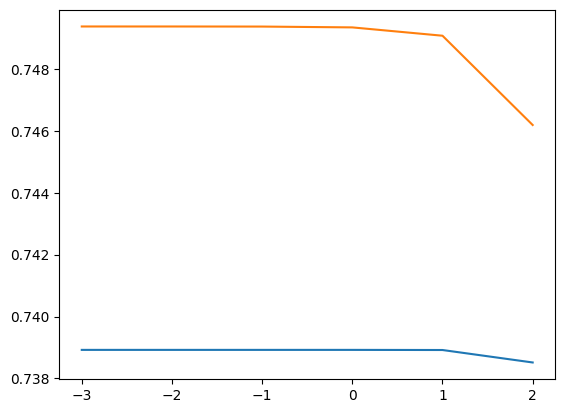

In [ ]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]   #과소적합이니깐 10으로!!!
for alpha in alpha_list :
  lasso = Lasso(alpha=alpha)
  lasso.fit(X_23_train_scaled, y_23_train)
  train_score.append(lasso.score(X_23_train_scaled, y_23_train))
  test_score.append(lasso.score(X_23_test_scaled, y_23_test))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)

plt.show()


In [ ]:
# 라쏘 회귀 모델 평가
lasso_predictions = lasso_model_23.predict(X_23_test)
lasso_mse = mean_squared_error(y_23_test, lasso_predictions)
print(f"Lasso Regression Mean Squared Error: {lasso_mse}")  #mse로 평가하면 집값 수치가 애초에 너무커서 평균제곱오차도 숫자가 너무 커보인당..ㅜ



Lasso Regression Mean Squared Error: 56989161.17354893


In [ ]:
print(lasso_model_23.coef_, lasso_model_23.intercept_)  #'전용면적(㎡)', '층_', '건축년도','X','Y' 중요도 순서  좌표 스케일링하니까 중요도 되게 낮아짐  ㄷㄷ;;

[523.13406825 183.75946548 373.69112486   0.          -0.        ] -748872.9804369226


In [ ]:
from sklearn.metrics import r2_score

# 테스트 데이터에 대한 예측값 생성
y_pred = lasso_model_23.predict(X_23_test)

# 결정 계수(R2) 계산
r2 = r2_score(y_23_test, y_pred)

print(f'R-squared (R2): {r2}')

#원래는 80%는 넘겨야 괜찮은 모델이라 하지만 주식이나 부동산 특히 해당 년도의 변동성이 너무 크니.. 이정도로 만족해라!!


R-squared (R2): 0.7487634124497077


In [ ]:
print(lasso_model_23.score(X_23_train, y_23_train))

print(lasso_model_23.score(X_23_test, y_23_test))
#과소적합 어떻게 해결하더라

print(lasso_model_23.score(XXX_23, yyy))

0.7175642831710981
0.7487634124497077
-0.7597590092719342


In [ ]:
#라쏘 결과 테스트용 셀
predictions_23 = lasso_model_23.predict(XXX_23)  #각 년도별로 모델적용해야됨
print(predictions_23)


[21659.07071925 21226.0522075  12469.97159979 ... 31627.58301593
 24785.34189406 19848.96336525]


In [ ]:
predictions_19 = lasso_model_19.predict(XXX_19)
predictions_20 = lasso_model_20.predict(XXX_20)
predictions_21 = lasso_model_21.predict(XXX_21)
predictions_22 = lasso_model_22.predict(XXX_22)
predictions_23 = lasso_model_23.predict(XXX_23)

print(predictions_19)
print(predictions_20)
print(predictions_21)
print(predictions_22)
print(predictions_23)


# 예시 numpy 배열
numpy_array = np.array(predictions_19)

# 판다스 DataFrame으로 변환
df = pd.DataFrame(numpy_array)

# to_csv 메서드 사용
df.to_csv("/content/predict_19", index=False)

[20963.04984527 20695.74803259 12531.15308169 ... 30486.86924374
 24150.27207494 19669.44380909]
[21910.96905436 21634.97515623 12841.09834337 ... 32168.51092892
 25352.71739293 20524.65953903]
[23119.93288912 22381.2102635  12770.91348102 ... 34073.57155402
 26358.98104156 20985.85358534]
[23191.26283299 22491.90672401 12875.20197041 ... 34081.29972218
 26410.93463168 20984.8224309 ]
[21659.07071925 21226.0522075  12469.97159979 ... 31627.58301593
 24785.34189406 19848.96336525]


In [ ]:
print(lasso_model_19.score(XXX_19, yyy))
print(lasso_model_20.score(XXX_20, yyy))
print(lasso_model_21.score(XXX_21, yyy))
print(lasso_model_22.score(XXX_22, yyy))
print(lasso_model_23.score(XXX_23, yyy))

-0.6390447021051824
-0.7461409320299184
-0.9526473182349813
-0.9600194328048519
-0.7597590092719342


In [ ]:
# XGBoost 모델 학습
xgb_model = XGBRegressor()
xgb_model.fit(X_23, y_23)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# 모델 초기화 및 학습
xgb_model_19 = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=3)  #depth=3 일때 MSE 값 최소 // .
xgb_model_19.fit(X_19, y_19)

xgb_model_20 = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=3)  #depth=3 일때 MSE 값 최소 //
xgb_model_20.fit(X_20, y_20)

xgb_model_21 = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=3)  #depth=3 일때 MSE 값 최소 //
xgb_model_21.fit(X_21, y_21)

xgb_model_22 = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=3)  #depth=3 일때 MSE 값 최소 //
xgb_model_22.fit(X_22, y_22)

xgb_model_23 = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=3)  #depth=3 일때 MSE 값 최소 // 400 0.1 3
xgb_model_23.fit(X_23, y_23)

# 테스트 데이터 예측 및 평가
y_pred = xgb_model_19.predict(X_19)
mse = mean_squared_error(y_19, y_pred)
print(f'Mean Squared Error: {mse}')

# 특성 중요도 확인
feature_importance = xgb_model_19.feature_importances_
print('Feature Importance:', feature_importance)

Mean Squared Error: 17083790.18790783
Feature Importance: [0.58418053 0.07077915 0.14998168 0.10255794 0.09250069]


In [ ]:
# XGBoost 모델 평가
xgb_predictions_19 = xgb_model_19.predict(XX_19)
xgb_mse_19 = mean_squared_error(yy_19, xgb_predictions_19)
print(f"XGBoost Mean Squared Error: {xgb_mse_19}")

xgb_predictions_20 = xgb_model_20.predict(XX_20)
xgb_mse_20 = mean_squared_error(yy_20, xgb_predictions_20)
print(f"XGBoost Mean Squared Error: {xgb_mse_20}")

xgb_predictions_21 = xgb_model_21.predict(XX_21)
xgb_mse_21 = mean_squared_error(yy_21, xgb_predictions_21)
print(f"XGBoost Mean Squared Error: {xgb_mse_21}")

xgb_predictions_22 = xgb_model_22.predict(XX_22)
xgb_mse_22 = mean_squared_error(yy_22, xgb_predictions_22)
print(f"XGBoost Mean Squared Error: {xgb_mse_22}")

xgb_predictions_23 = xgb_model_23.predict(XX_23)
xgb_mse_23 = mean_squared_error(yy_23, xgb_predictions_23)
print(f"XGBoost Mean Squared Error: {xgb_mse_23}")

XGBoost Mean Squared Error: 49261760.96608589
XGBoost Mean Squared Error: 46193850.85746199
XGBoost Mean Squared Error: 65154505.107305825
XGBoost Mean Squared Error: 72549351.02575211
XGBoost Mean Squared Error: 48889989.75651391


In [ ]:
print(xgb_predictions_19)
print(xgb_predictions_20)
print(xgb_predictions_21)
print(xgb_predictions_22)
print(xgb_predictions_23)

[25567.508 48842.29  17648.312 21621.744 23868.25  27664.45  27664.45
 15463.708 15853.711 39764.09  12003.993 22863.428 13877.177 18362.8
 14420.031 16583.797 16674.383 19832.    18002.627 18826.246 20414.145
 21954.662 22495.639 15112.631 15203.217 18623.094 20414.482 21844.889
 16583.797 18312.846 45026.977 56721.414 18298.363 12645.362 12425.468
 13149.785 13570.46  19070.375 19285.422 23848.643 18208.012 19600.275
 23233.684 24848.578 21278.285 19724.504 20667.514 16398.604 17957.086
 19806.076 20496.627 21222.713 19251.791 17227.615 17977.229 20126.578
 20549.014 17726.885 18575.59  23084.86  23339.197 23429.783 23429.783
 23339.197 33828.63  19526.09  21743.314 24936.227 17406.035 19981.283
 23401.154 23294.758 32497.084 72950.234 72684.62  72950.234 20326.363
 30392.44  16398.604 18909.725 18909.725 19231.441 21189.676 23130.05
 26468.416 32261.412 17278.412 19472.398 20408.434 20408.434 20477.01
 21801.326 21466.967 16919.023 21160.873 21279.021 21279.021 21279.021
 21623.955 

In [ ]:
print(xgb_model_19.score(XX_19, yy_19))
print(xgb_model_20.score(XX_20, yy_20))
print(xgb_model_21.score(XX_21, yy_21))
print(xgb_model_22.score(XX_22, yy_22))
print(xgb_model_23.score(XX_23, yy_23))


0.4999272822624069
0.47191281810123253
0.48628951334393755
0.4608132864572919
0.5274400673801727


In [ ]:
from sklearn.model_selection import GridSearchCV

#XGB 파라미터 튜닝 그리드서치이
param_grid = {
    'learning_rate': [0.1, 0.01, 0.05],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200, 300, 400, 500]
}

grid_search = GridSearchCV(XGBRegressor(), param_grid, cv=3)
grid_search.fit(X_23, y_23)

best_params = grid_search.best_params_
print(best_params)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 400}
